In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
plt.rc('font', family='AppleGothic')

In [24]:
df = pd.read_csv("../chapter_06/data/ns_book.csv", low_memory=False)
df.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [25]:
top30_pubs = df['출판사'].value_counts()[:30]
top30_pubs

출판사
문학동네           4410
민음사            3349
김영사            3246
웅진씽크빅          3227
시공사            2685
창비             2469
문학과지성사         2064
위즈덤하우스         1981
학지사            1877
한울             1553
한국학술정보         1496
열린책들           1491
살림출판사          1479
한길사            1460
博英社            1458
커뮤니케이션북스       1445
지식을만드는지식       1390
자음과모음          1364
비룡소            1331
랜덤하우스코리아       1314
넥서스            1310
황금가지           1101
길벗             1094
시그마프레스         1063
현암사            1054
다산북스           1046
집문당            1038
책세상            1037
한국문화사          1028
북이십일 21세기북스    1026
Name: count, dtype: int64

In [26]:
top30_pubs.index

Index(['문학동네', '민음사', '김영사', '웅진씽크빅', '시공사', '창비', '문학과지성사', '위즈덤하우스', '학지사',
       '한울', '한국학술정보', '열린책들', '살림출판사', '한길사', '博英社', '커뮤니케이션북스', '지식을만드는지식',
       '자음과모음', '비룡소', '랜덤하우스코리아', '넥서스', '황금가지', '길벗', '시그마프레스', '현암사',
       '다산북스', '집문당', '책세상', '한국문화사', '북이십일 21세기북스'],
      dtype='object', name='출판사')

In [27]:
top30_pubs_idx = df['출판사'].isin(top30_pubs.index)
top30_pubs_idx

0          True
1         False
2         False
3         False
4          True
          ...  
376765    False
376766    False
376767     True
376768    False
376769    False
Name: 출판사, Length: 376770, dtype: bool

In [28]:
df1 = df[top30_pubs_idx].sample(1000, random_state=42)
df1.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
141760,155786,제갈량 문집,제갈량 지음 ;조영래 옮김,지식을만드는지식,2012,9788966805785,NaN,0,10,808,1,2,2013-04-10
249855,268595,존 레넌을 찾아서,토니 파슨스 지음;이은정 옮김,시공사,2007,9788952750419,NaN,0,NaN,843,1,18,2007-12-14
129347,142802,요리사 & 쇼핑호스트 :생활과학 계열·예체능 계열,와이즈멘토 글 ;김성희 그림,김영사,2013,9788934959854,9788934959717,7,14,321.55,1,3,2013-12-09
349194,371975,임정섭의 글쓰기 훈련소,임정섭 지음,다산북스,2017,9791130614472,NaN,NaN,NaN,NaN,1,0,1970-01-01
46734,51748,초한지 :이문열의 史記 이야기,지은이: 이문열,민음사,2017,9788937481659,9788937481581,0,7,813.6,1,9,2018-07-02


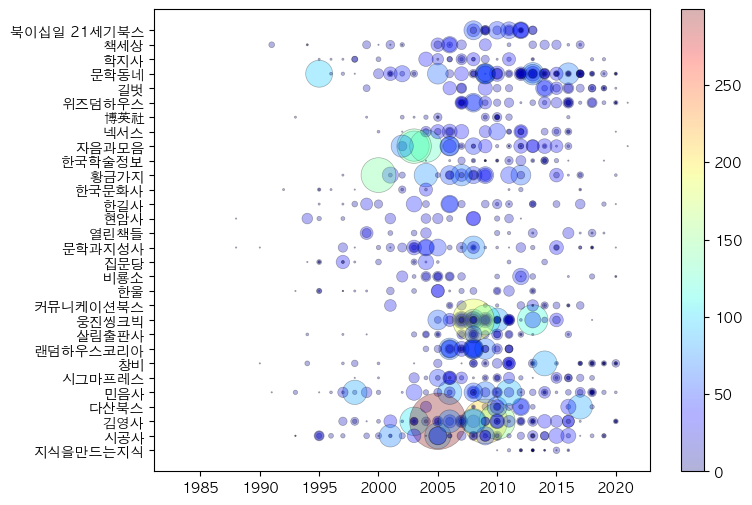

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))

sc = ax.scatter(
            df1['발행년도'], 
            df1['출판사'],
            s=df1['대출건수']**1.3,
            c=df1['대출건수'],
            cmap='jet',
            alpha = 0.3,
            edgecolor = 'k',
            linewidths=0.5
)

plt.colorbar(sc)
plt.show()

In [30]:
df2 = df[top30_pubs_idx][['출판사', '발행년도', '대출건수']]
df2.head()

,출판사,발행년도,대출건수
0,민음사,2021,0
4,김영사,2021,0
23,문학동네,2021,0
24,한길사,2021,0
39,현암사,2021,0


In [31]:
df2 = df2.groupby(by=['출판사', '발행년도']).sum()

In [32]:
df2

대출건수
출판사  발행년도      
博英社  1947     0
     1975     0
     1977     0
     1986     1
     1987     1
...         ...
황금가지 2018   200
     2019   133
     2020    98
     2021     1
     2030     2

[886 rows x 1 columns]

In [33]:
df2 = df2.reset_index()

In [34]:
df2

,출판사,발행년도,대출건수
0,博英社,1947,0
1,博英社,1975,0
2,博英社,1977,0
3,博英社,1986,1
4,博英社,1987,1
...,...,...,...
881,황금가지,2018,200
882,황금가지,2019,133
883,황금가지,2020,98
884,황금가지,2021,1


In [35]:
df2[df2['출판사'] == '황금가지'].head()

,출판사,발행년도,대출건수
858,황금가지,1995,0
859,황금가지,1996,67
860,황금가지,1997,116
861,황금가지,1998,526
862,황금가지,1999,505


In [36]:
line1 = df2[df2['출판사'] == '황금가지']
line2 = df2[df2['출판사'] == '비룡소']

In [37]:
line1

,출판사,발행년도,대출건수
858,황금가지,1995,0
859,황금가지,1996,67
860,황금가지,1997,116
861,황금가지,1998,526
862,황금가지,1999,505
863,황금가지,2000,1152
864,황금가지,2001,722
865,황금가지,2002,1493
866,황금가지,2003,2001
867,황금가지,2004,2744


In [38]:
line2

,출판사,발행년도,대출건수
296,비룡소,1990,0
297,비룡소,1991,2
298,비룡소,1994,217
299,비룡소,1995,17
300,비룡소,1996,15
301,비룡소,1997,13
302,비룡소,1998,107
303,비룡소,1999,82
304,비룡소,2000,166
305,비룡소,2001,826


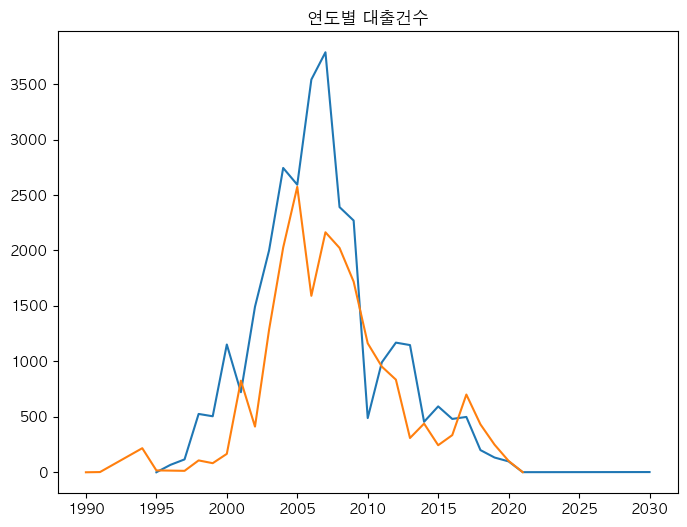

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(line1['발행년도'], line1['대출건수'])
ax.plot(line2['발행년도'], line2['대출건수'])

ax.set_title('연도별 대출건수')
plt.show()


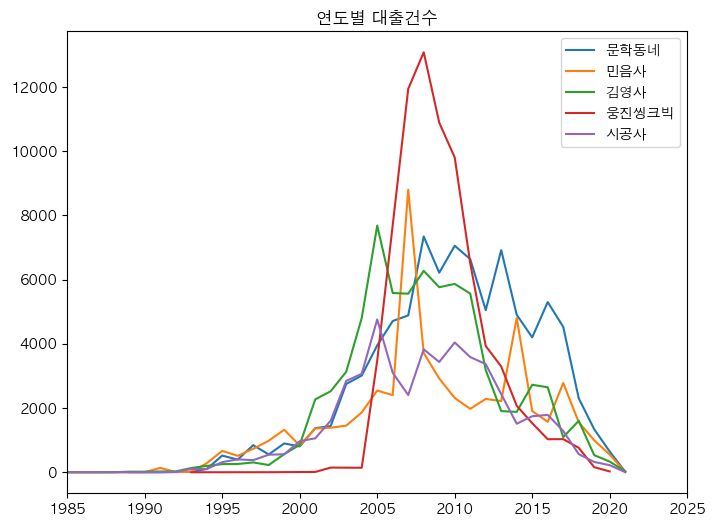

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))
for pub in top30_pubs.index[:5]:
    line = df2[df2['출판사'] == pub]
    ax.plot(line['발행년도'], line['대출건수'], label=pub)

ax.set_title("연도별 대출건수")
ax.legend()
ax.set_xlim(1985, 2025)

plt.show()

In [43]:
df3 = df2.pivot_table(index='출판사', columns='발행년도')
df3.head()

대출건수                                               ...                  \
발행년도 1947 1974 1975 1976 1977 1978 1979 1980 1981 1982  ...    2013    2014   
출판사                                                     ...                   
博英社   0.0  NaN  0.0  NaN  0.0  NaN  NaN  NaN  NaN  NaN  ...     NaN   118.0   
길벗    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1162.0  1619.0   
김영사   NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  0.0  ...  1905.0  1881.0   
넥서스   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1828.0  1429.0   
다산북스  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1100.0  1361.0   

                                                               
발행년도    2015    2016    2017    2018   2019   2020  2021 2030  
출판사                                                            
博英社     57.0    47.0     2.0     8.0    NaN    1.0   NaN  NaN  
길벗    1410.0  1597.0  1626.0  1004.0  773.0  292.0  12.0  NaN  
김영사   2726.0  2647.0  1094.0  1602.0  533.0  332.0  30.0  NaN  
넥서스    765.0  1146.0   932.0   565.0   90.0   15.0   0.0  NaN  
다산북스  1321.0  1137.0  1249.0   773.0  530.0  127.0  13.0  NaN  

[5 rows x 50 columns]

In [44]:
df3.columns[:10]

MultiIndex([('대출건수', 1947),
            ('대출건수', 1974),
            ('대출건수', 1975),
            ('대출건수', 1976),
            ('대출건수', 1977),
            ('대출건수', 1978),
            ('대출건수', 1979),
            ('대출건수', 1980),
            ('대출건수', 1981),
            ('대출건수', 1982)],
           names=[None, '발행년도'])

In [45]:
top10_pubs = top30_pubs.index[:10]
year_cols = df3.columns.get_level_values(1)

In [46]:
top10_pubs

Index(['문학동네', '민음사', '김영사', '웅진씽크빅', '시공사', '창비', '문학과지성사', '위즈덤하우스', '학지사',
       '한울'],
      dtype='object', name='출판사')

In [47]:
year_cols

Index([1947, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2030],
      dtype='int64', name='발행년도')

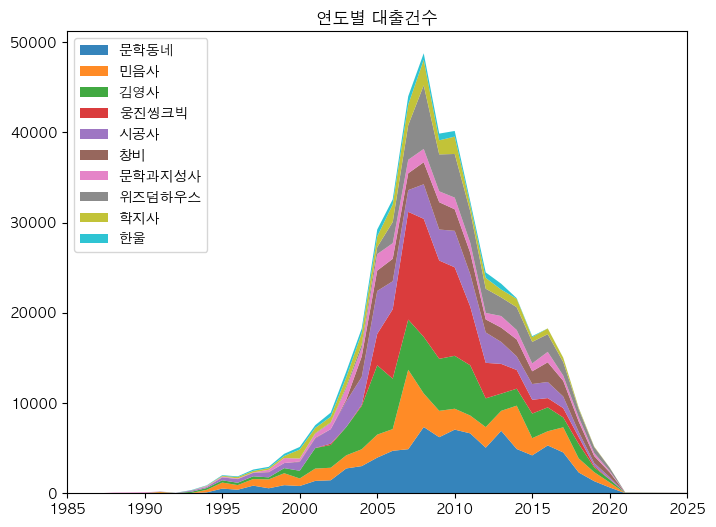

In [52]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.stackplot(
        year_cols,
        df3.loc[top10_pubs].fillna(0),
        labels=top10_pubs,
        alpha=0.9
)

ax.set_title('연도별 대출건수')
ax.legend(loc='upper left')
ax.set_xlim(1985, 2025)

plt.show()

In [54]:
df4 = df3.loc[top10_pubs].cumsum()
df4.head()

대출건수                                               ...           \
발행년도  1947 1974 1975 1976 1977 1978 1979 1980 1981 1982  ...     2013   
출판사                                                      ...            
문학동네   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   6919.0   
민음사    NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   9138.0   
김영사    NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  0.0  ...  11043.0   
웅진씽크빅  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  14336.0   
시공사    NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN  NaN  NaN  ...  16769.0   

                                                                              
발행년도      2014     2015     2016     2017    2018    2019    2020  2021 2030  
출판사                                                                           
문학동네    4904.0   4201.0   5301.0   4529.0  2306.0  1340.0   645.0  18.0  NaN  
민음사     9709.0   6108.0   6872.0   7311.0  3865.0  2338.0  1197.0  25.0  NaN  
김영사    11590.0   8834.0   9519.0   8405.0  5467.0  2871.0  1529.0  55.0  NaN  
웅진씽크빅  13662.0  10363.0  10548.0   9437.0  6229.0  3030.0  1555.0   NaN  NaN  
시공사    15174.0  12108.0  12335.0  10724.0  6795.0  3352.0  1776.0  60.0  NaN  

[5 rows x 50 columns]

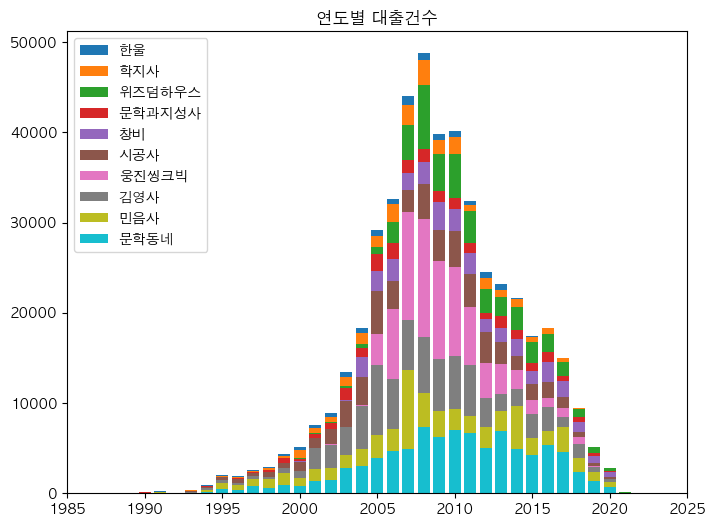

In [56]:
fig, ax = plt.subplots(figsize=(8, 6))

for i in reversed(range(len(df4))):
    bar = df4.iloc[i]
    label = df4.index[i]
    ax.bar(year_cols, bar, label=label)

ax.set_title("연도별 대출건수")
ax.legend(loc='upper left')
ax.set_xlim(1985, 2025)

plt.show()

In [58]:
data = top30_pubs[:10]
labels = top30_pubs.index[:10]

In [59]:
data

출판사
문학동네      4410
민음사       3349
김영사       3246
웅진씽크빅     3227
시공사       2685
창비        2469
문학과지성사    2064
위즈덤하우스    1981
학지사       1877
한울        1553
Name: count, dtype: int64

In [60]:
labels

Index(['문학동네', '민음사', '김영사', '웅진씽크빅', '시공사', '창비', '문학과지성사', '위즈덤하우스', '학지사',
       '한울'],
      dtype='object', name='출판사')

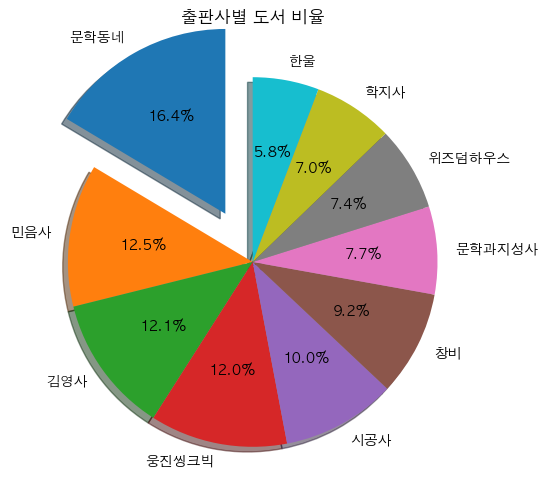

In [67]:
fig, ax = plt.subplots(figsize = (8, 6))

ax.pie(
        data,
        labels=labels,
        autopct="%.1f%%",
        shadow=True,
        explode=[0.3] + [0]*9,
        startangle=90,
)

ax.set_title('출판사별 도서 비율')

plt.show()

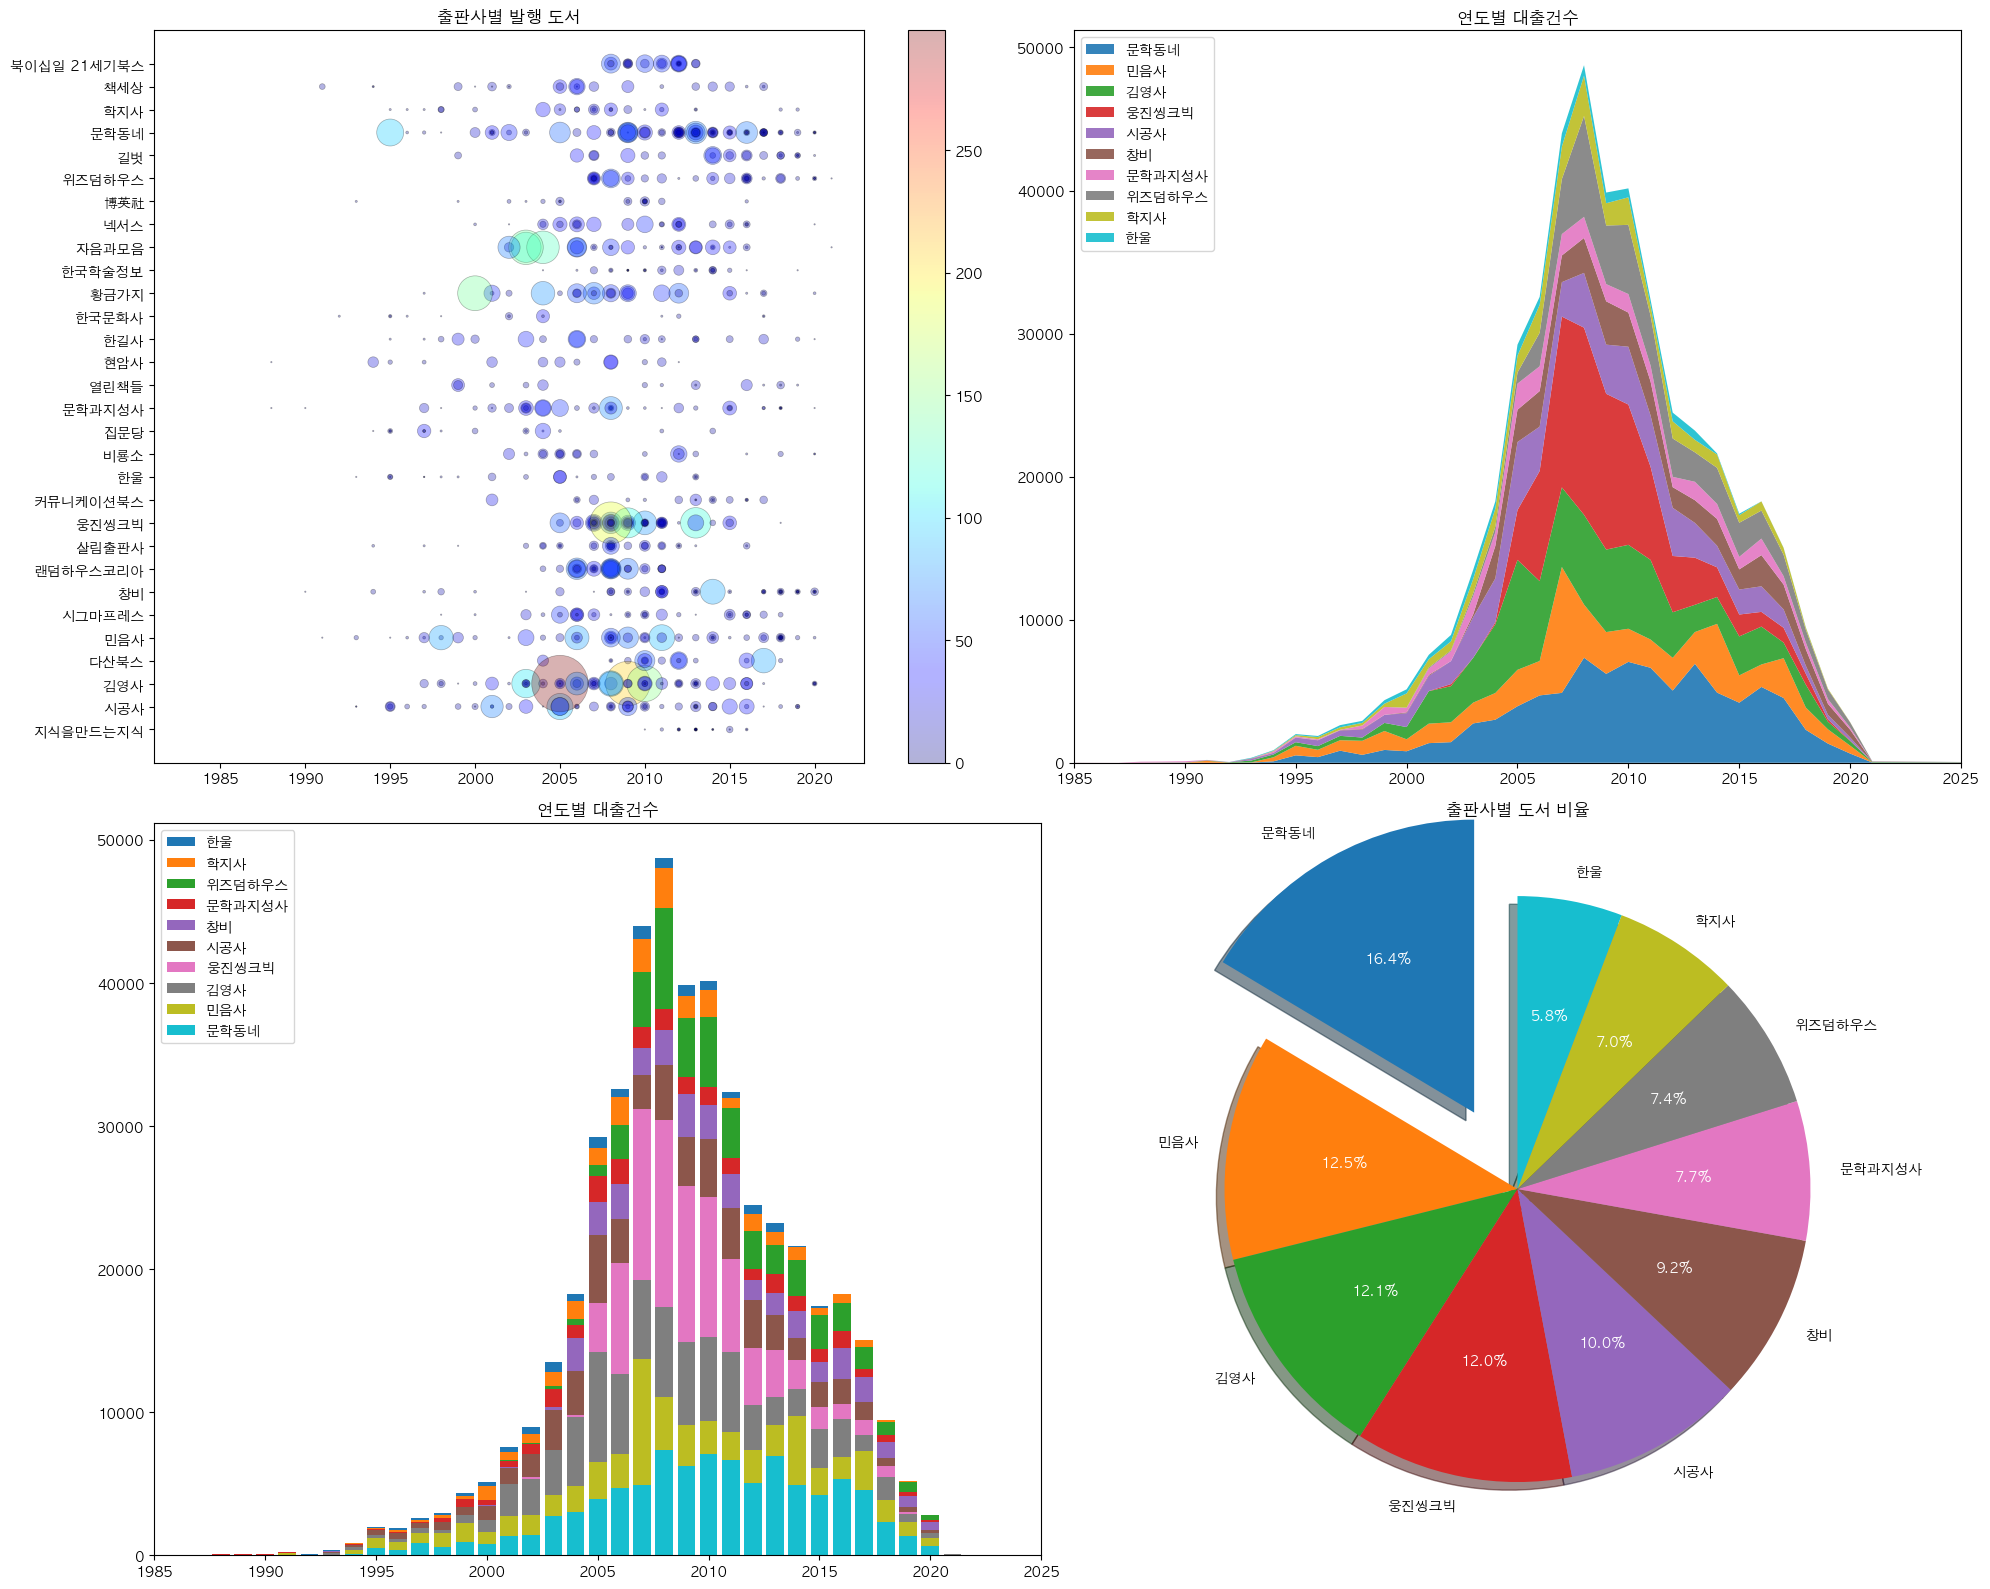

In [73]:
fit, axes = plt.subplots(2, 2, figsize=(20, 16))

# 산점도 그래프
sc = axes[0, 0].scatter(
                    df1['발행년도'], 
                    df1['출판사'],
                    s=df1['대출건수']**1.3,
                    c=df1['대출건수'],
                    cmap='jet',
                    alpha = 0.3,
                    edgecolor = 'k',
                    linewidths=0.5
)
axes[0, 0].set_title('출판사별 발행 도서')
plt.colorbar(sc, ax=axes[0, 0])

# 스택 라인 그래프
axes[0, 1].stackplot(
        year_cols,
        df3.loc[top10_pubs].fillna(0),
        labels=top10_pubs,
        alpha=0.9
)

axes[0, 1].set_title('연도별 대출건수')
axes[0, 1].legend(loc='upper left')
axes[0, 1].set_xlim(1985, 2025)

# 스택 막대 그래프
for i in reversed(range(len(df4))):
    bar = df4.iloc[i]
    label = df4.index[i]
    axes[1, 0].bar(year_cols, bar, label=label)

axes[1, 0].set_title("연도별 대출건수")
axes[1, 0].legend(loc='upper left')
axes[1, 0].set_xlim(1985, 2025)

# 원형 그래프
patches, texts, autotexts = axes[1, 1].pie(
        data,
        labels=labels,
        autopct="%.1f%%",
        shadow=True,
        explode=[0.3] + [0]*9,
        startangle=90,
)

for t in texts:
    t.set_color('black')
    t.set_fontsize(10)
    
for t in autotexts:
    t.set_color('white')
    t.set_fontsize(10)

axes[1, 1].set_title('출판사별 도서 비율')

plt.savefig('chapter_06')
plt.tight_layout()

plt.show()

In [1]:
data = pd.read_csv("test.csv")

data

NameError: name 'pd' is not defined